## **TASK 2:- TO EXPLORE SUPERVISED MACHINE LEARNING**
```
PREDECTION OF SCORE BASED UPON THE NUMBER OF HOURS OF STUDY USING LINEAR REGRESSION MODEL


**IMPORTING THE LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#IMPORTING THE DATASET AND PREPARING IT
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported sucessfully")
X = df.iloc[:, :-1]
y = df.iloc[: , -1]

Data imported sucessfully


In [7]:
#Checking the first five entries
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# Getting the data description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


DATA VISUALISATION

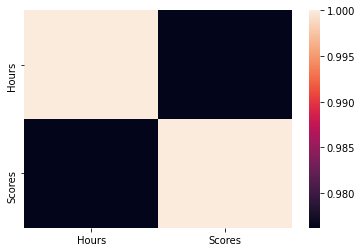

In [9]:

sns.heatmap(df.corr())

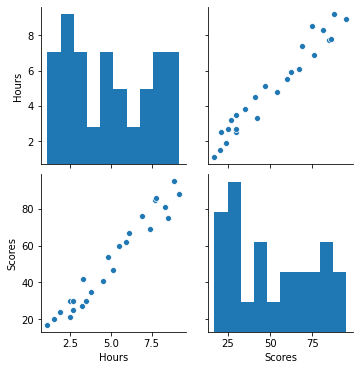

In [10]:
sns.pairplot(df)

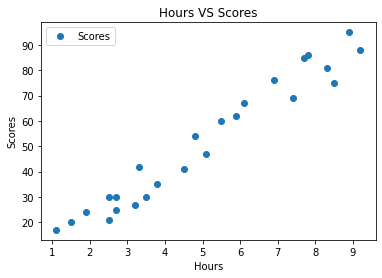

In [11]:
df.plot (x = 'Hours' , y = 'Scores' , style= 'o')
plt.title('Hours VS Scores')
plt.xlabel ('Hours')
plt.ylabel ('Scores')
plt.show()

Training and Testing the Data



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [13]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

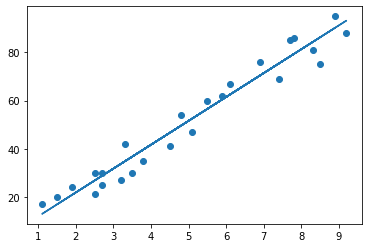

In [14]:
#Plotting Regression Line
line = regressor.coef_* X + regressor.intercept_

plt.scatter(X,y)
plt.plot(X , line)
plt.show()

Predection of result using data

In [15]:
y_predict = regressor.predict(X_test)
print (y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [16]:
#Comparing original vs predicted
dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
dfs

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
#Checking Accuracy of the Linear Regression Model
accuracy = (regressor.score(X_test , y_test)) * 100
print ('Accuracy :' , accuracy, '%')

Accuracy : 94.54906892105353 %


In [18]:
#Testing with own data
hours = 9.25
own_pred= regressor.predict([[hours]])
print('No of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


Mean Absolute Error

In [19]:
from sklearn import metrics
print('Mean absolute error:' , metrics.mean_absolute_error(y_test, y_predict))

Mean absolute error: 4.183859899002982
